In [69]:
import csv
import numpy as np
import pymzml
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Data processing - From csv to ml input

In [70]:
precision = 0.005
data_per_sec = 2
number_ticks = 240
half_time_window = 60 #sec
 
data_train = './train.csv'
data_test = './test.csv'
data_mz_path = "./clarkii T0I1.mzML"

data_train2 = './train2.csv'
data_test2 = './test2.csv'

In [71]:
def get_data_mz(data_mz ,mz , retention_time):
    
    run = pymzml.run.Reader(data_mz)
    
    data = []
    
    ticks_processed = 0
    
    for i, scan in enumerate(run):
        
        if scan.ms_level == 1:

            t, measure = scan.scan_time  # get scan time

            if t >= (retention_time-half_time_window):
                
                ticks_processed +=1
                
                mz_in_range = []
                for d in scan.peaks('raw'):
                    mz_scan = d[0]
                    i_scan = d[1]
                    
                    if mz_scan >= mz - precision  and mz_scan <= mz + precision:
                        mz_in_range.append(i_scan)
                        
                if not mz_in_range:
                    data.append(0)
                else:
                    data.append(mz_in_range[0])
                    
                if ticks_processed == number_ticks:
                    break
                                
    return data
    



In [72]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    

    if window_len<3:
        return x




    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

In [119]:
def NormalizeData(data):
    if np.max(data) - np.min(data) == 0.0:
        print('ERROR')
        return data
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def build_data_ml(path):
    
    X_ = []
    y_ = []
    
    
    
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=';')
        for line in list(reader):
            X_train_item = get_data_mz(data_mz_path, float(line[1]), float(line[2])*60)
            y_.append(1 if line[6] == 'YES' else 0)   
            
            xp = [i for i in range(0,len(X_train_item))]
            fp = [i for i in range(0,len(X_train_item))]
            X_train_interp = smooth(X_train_item,window='hanning')  #'flat', 'hanning', 'hamming', 'bartlett', 'blackman'          
            X_train_norm = NormalizeData(X_train_interp)
            X_.append(X_train_norm)
            
            #plt.plot(X_train_item)
            #plt.plot(X_train_interp)
            plt.title(line[6] + ' ' + line[1] + '/' + str(float(line[2])*60))
            plt.plot(X_train_norm)
            plt.show()     
            
    return X_, y_
        

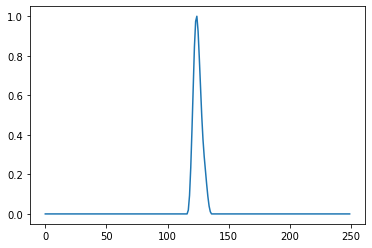

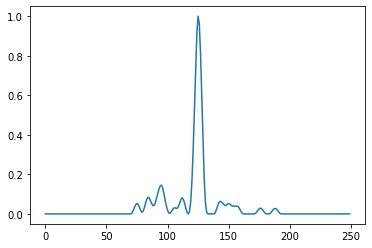

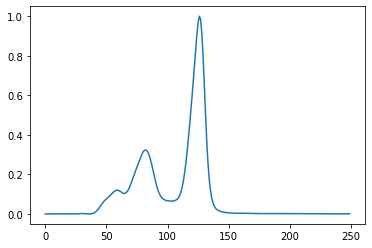

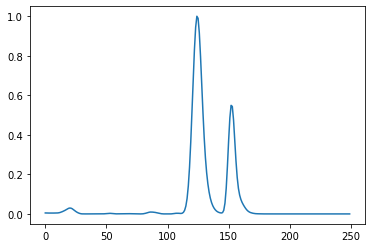

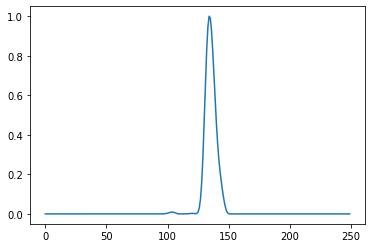

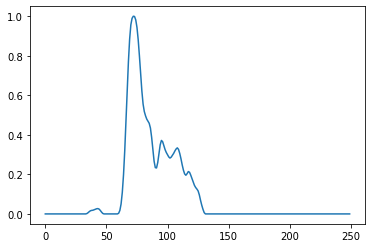

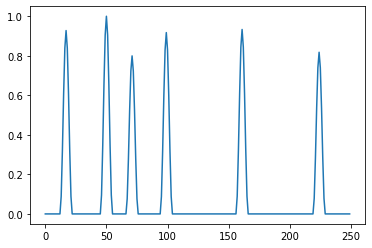

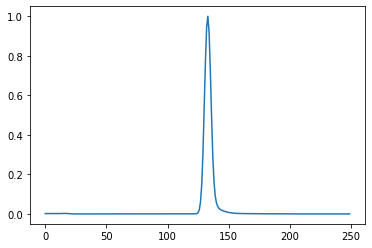

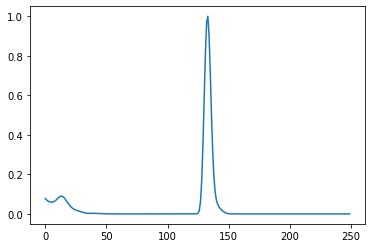

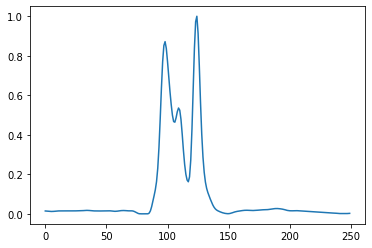

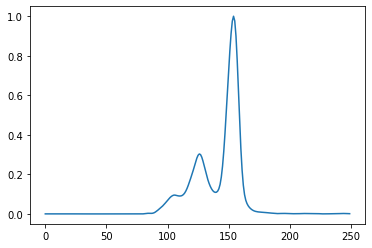

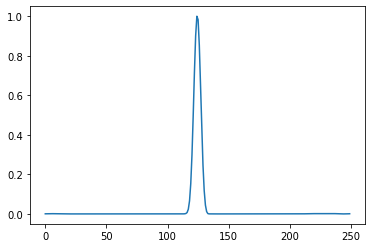

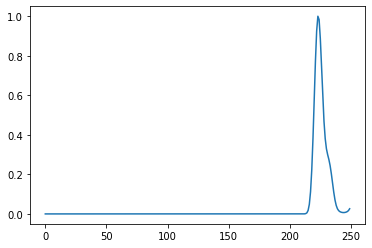

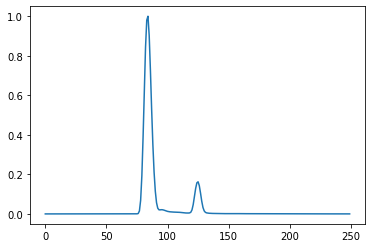

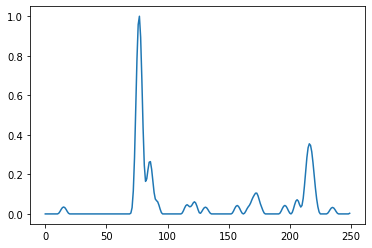

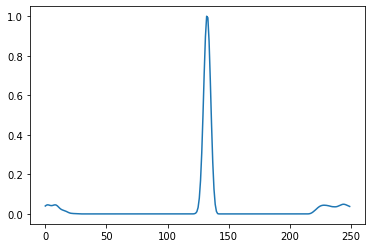

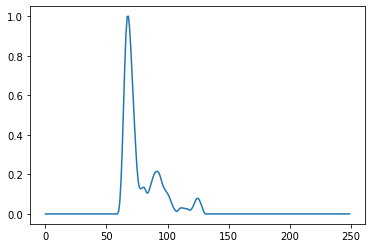

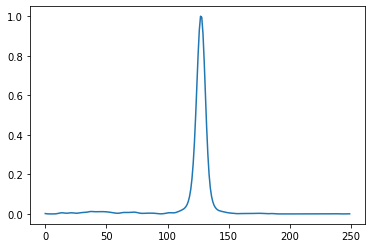

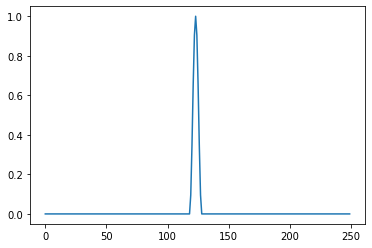

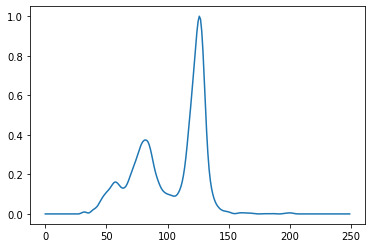

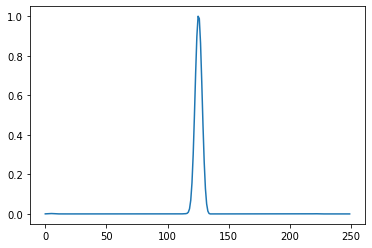

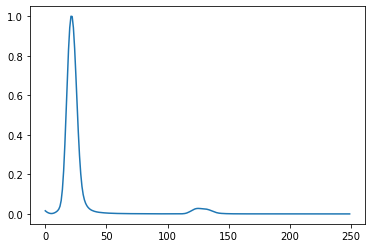

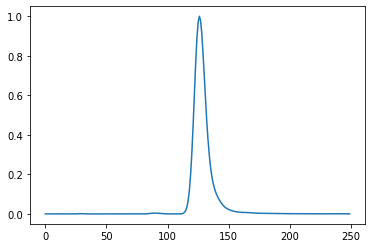

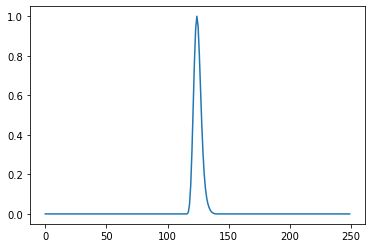

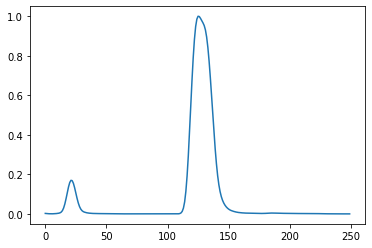

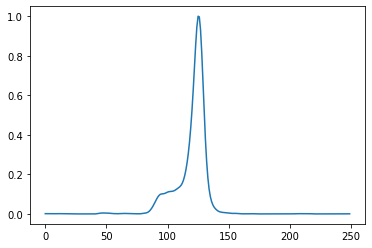

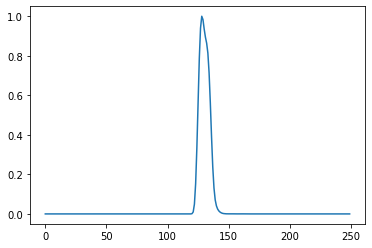

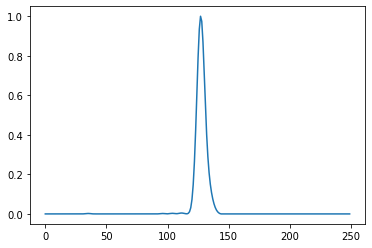

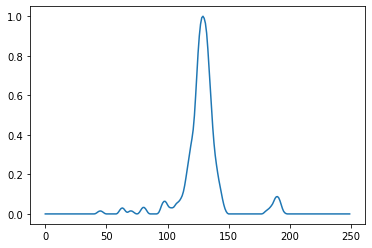

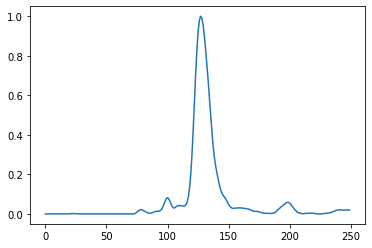

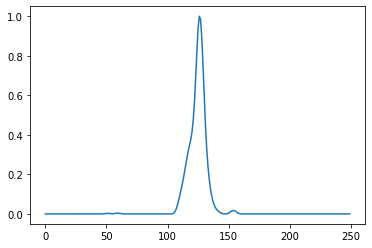

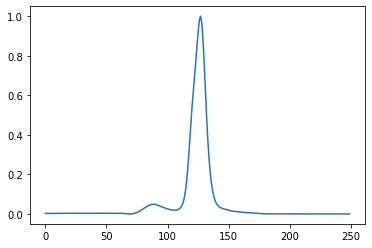

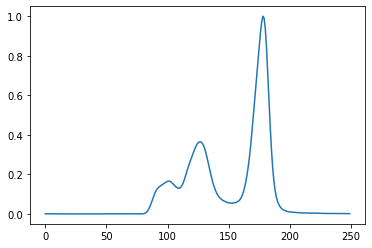

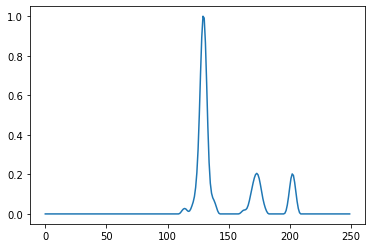

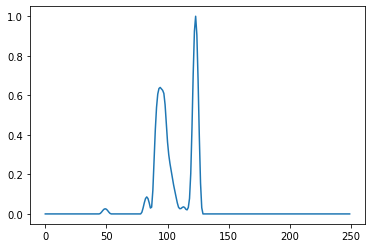

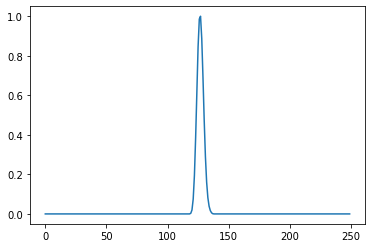

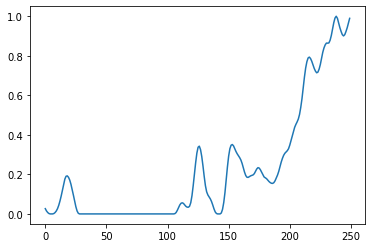

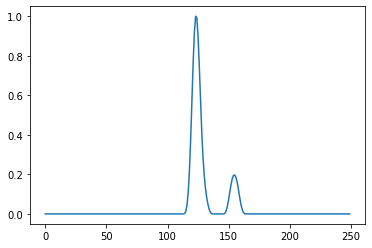

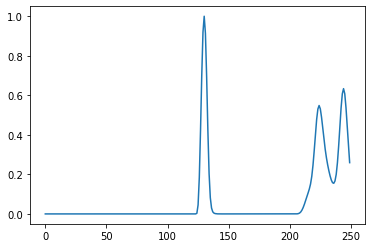

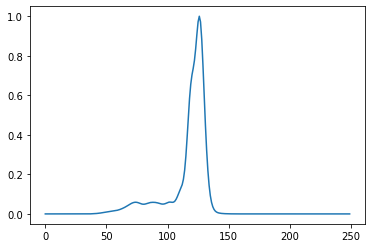

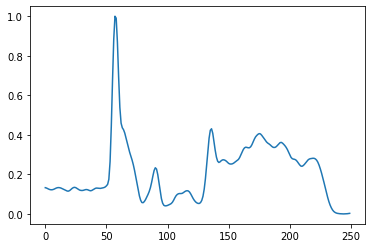

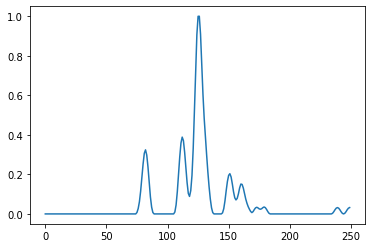

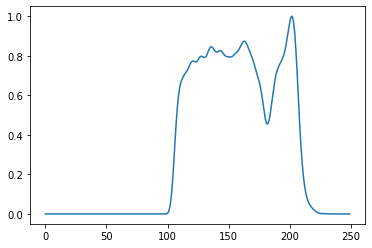

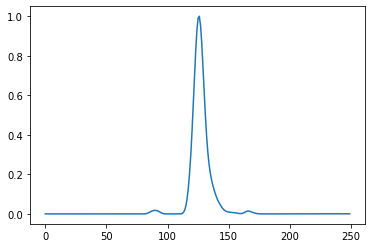

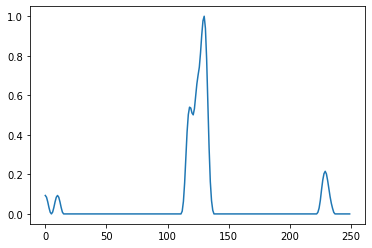

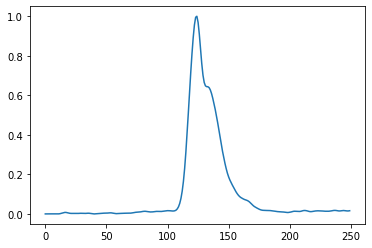

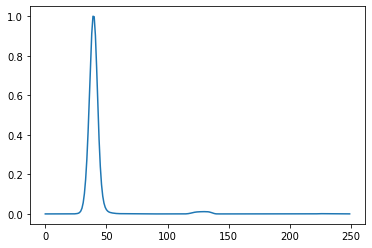

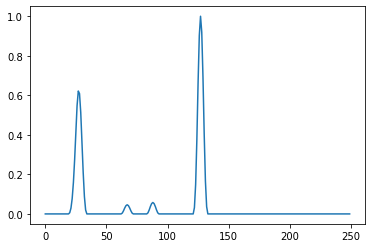

ERROR


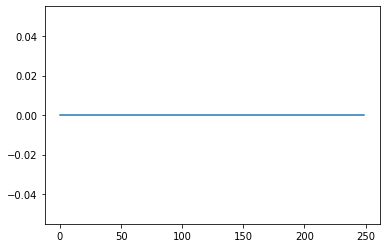

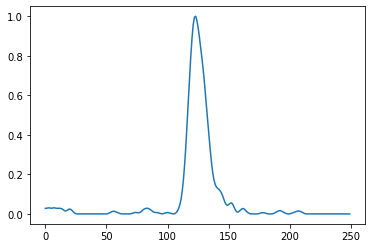

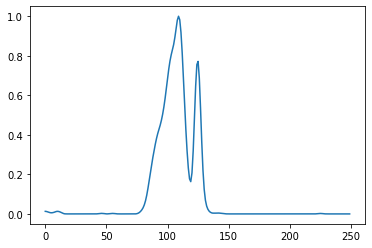

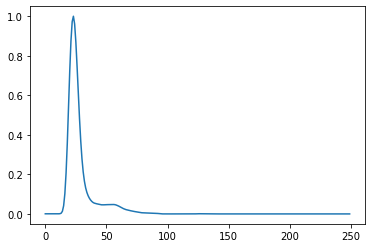

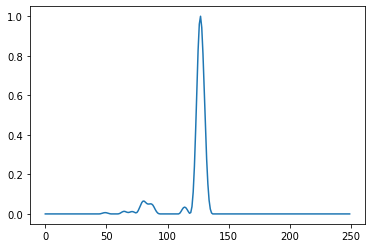

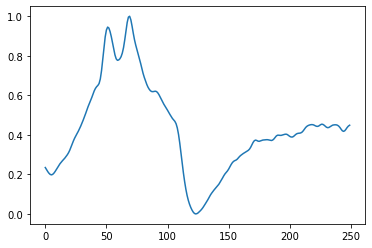

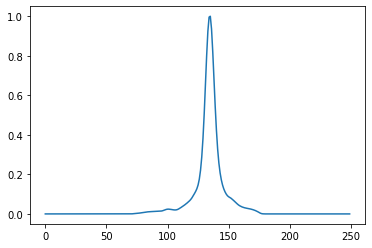

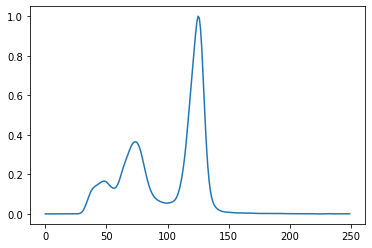

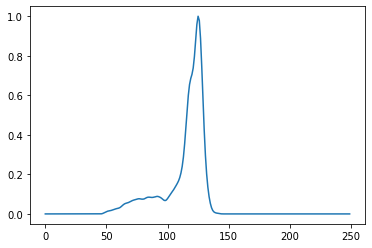

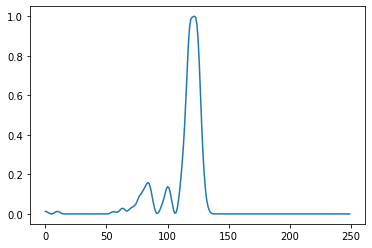

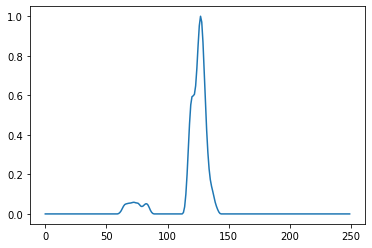

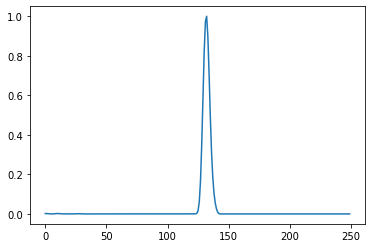

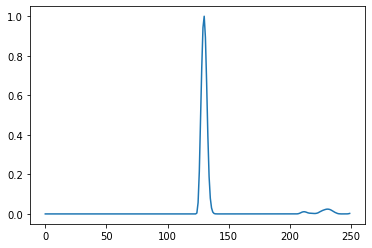

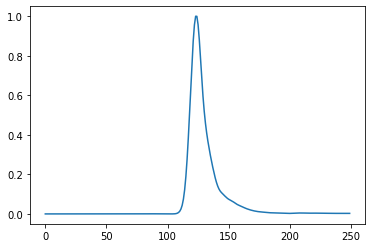

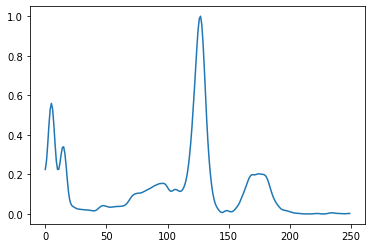

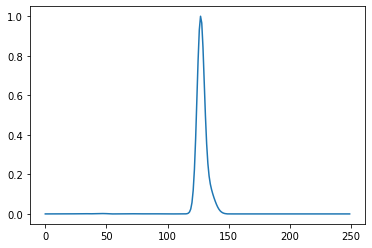

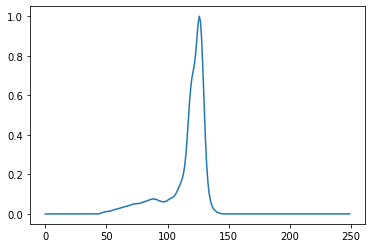

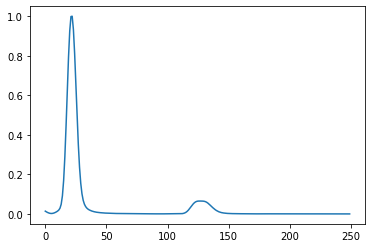

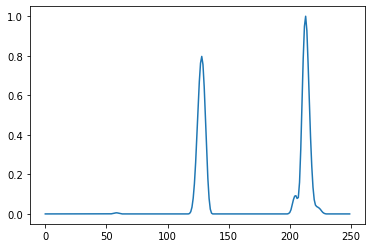

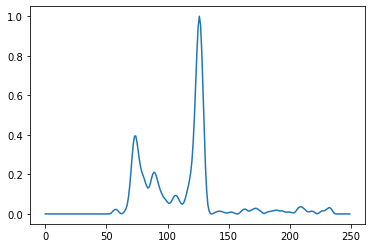

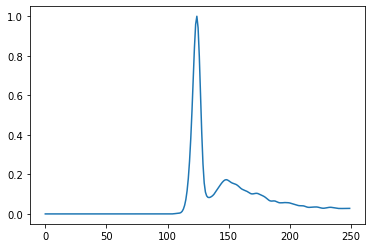

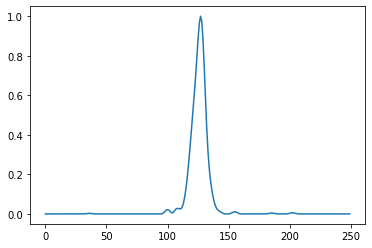

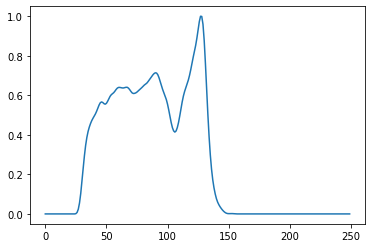

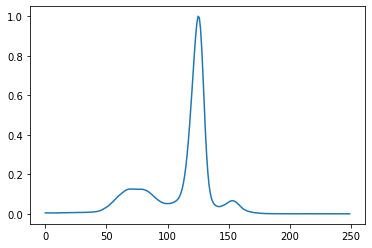

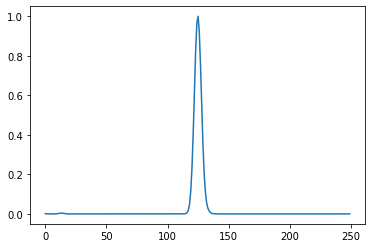

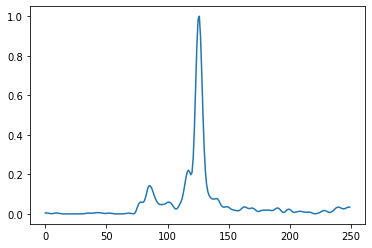

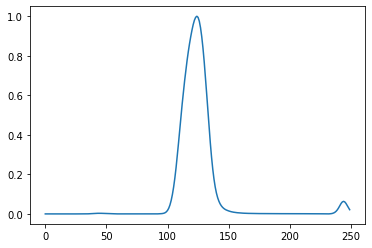

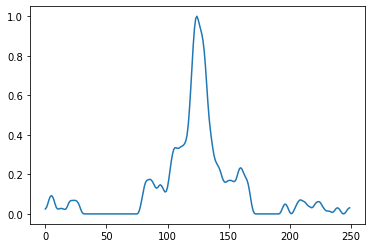

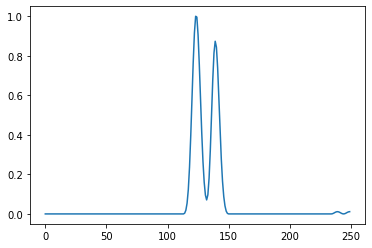

ERROR


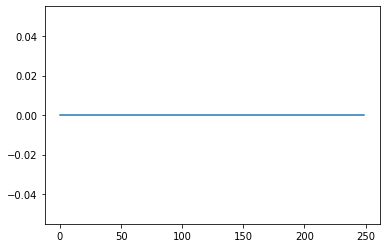

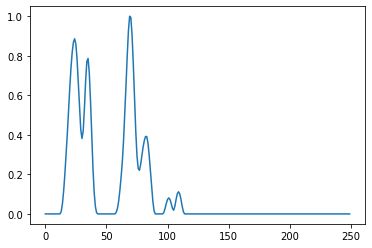

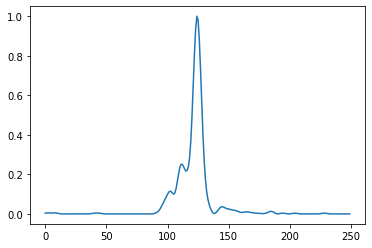

ERROR


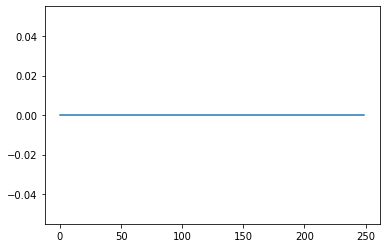

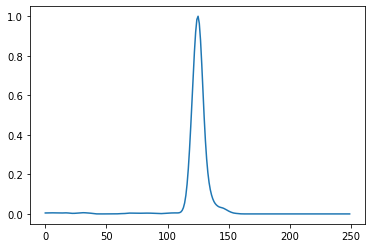

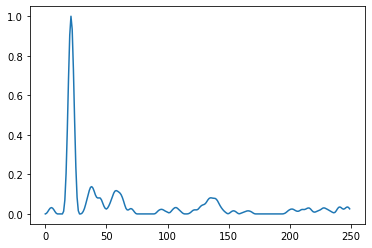

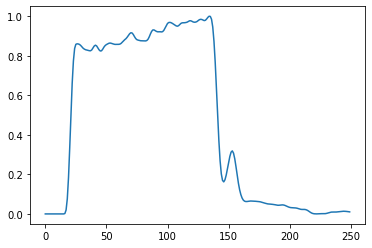

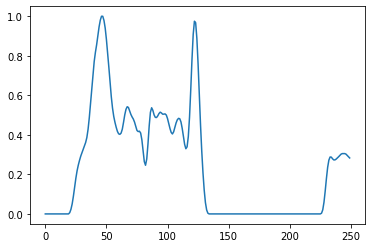

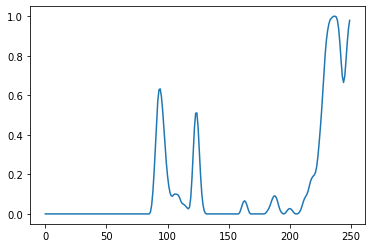

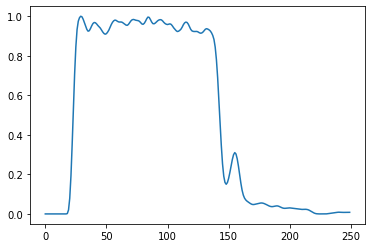

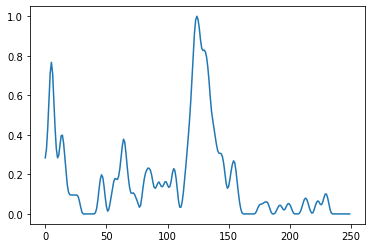

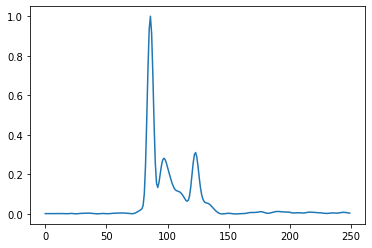

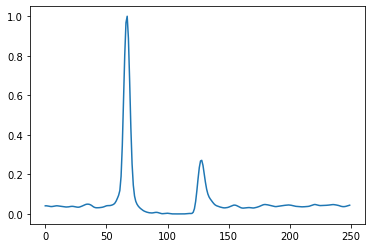

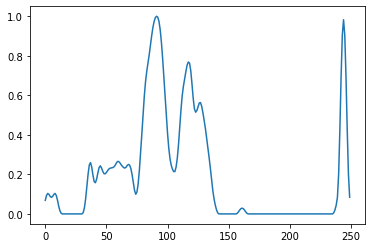

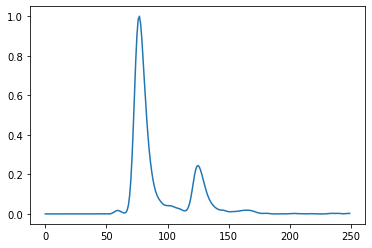

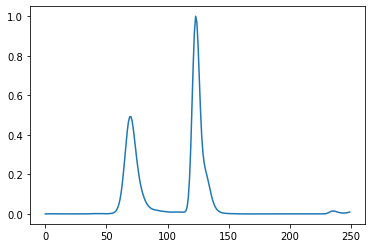

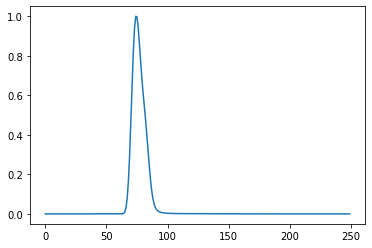

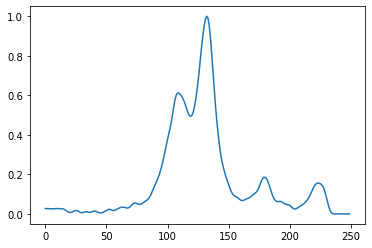

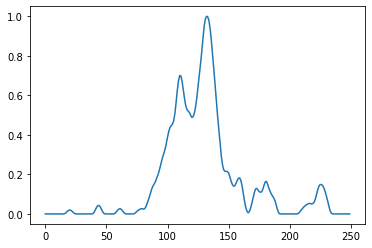

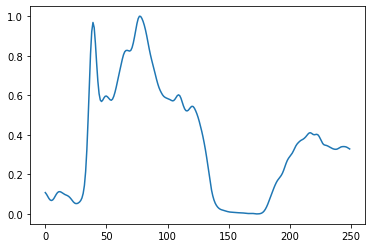

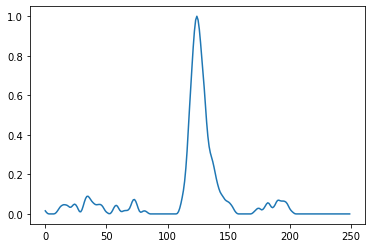

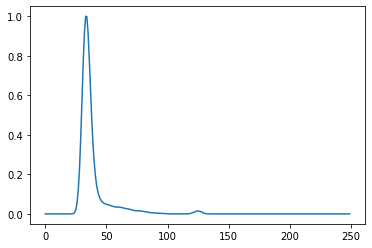

In [118]:
(X_train, y_train) = build_data_ml(data_train2)

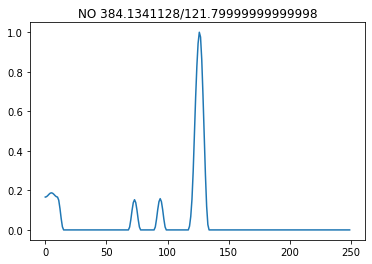

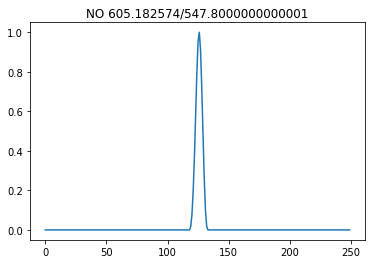

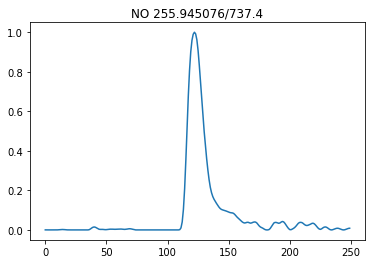

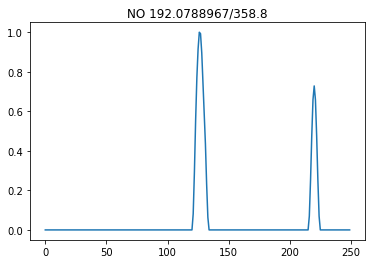

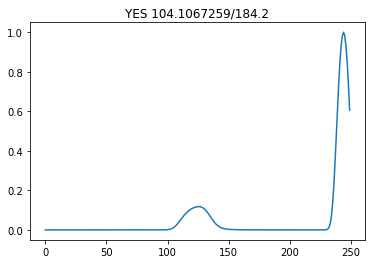

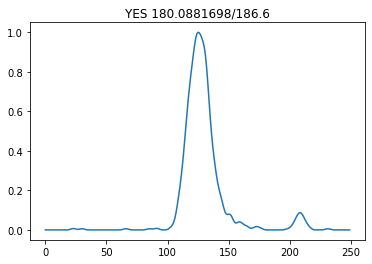

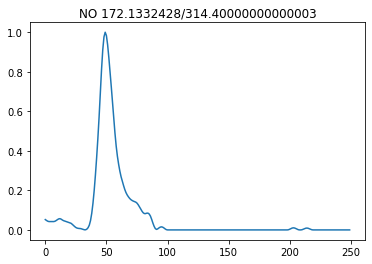

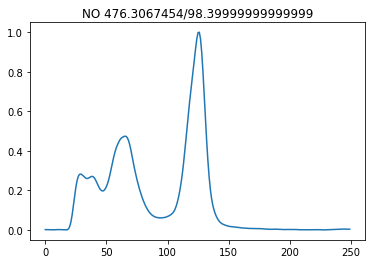

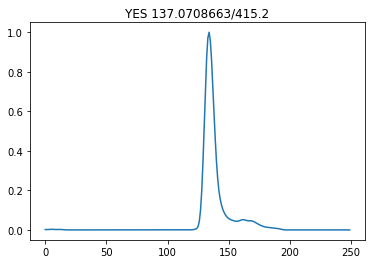

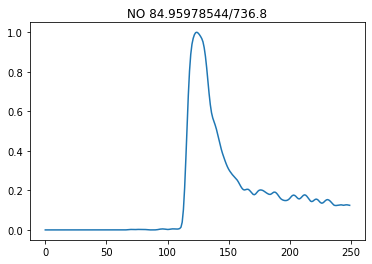

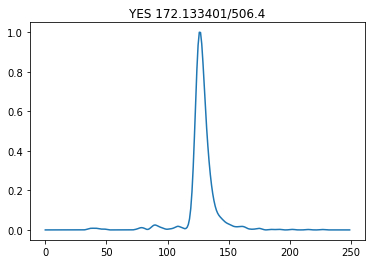

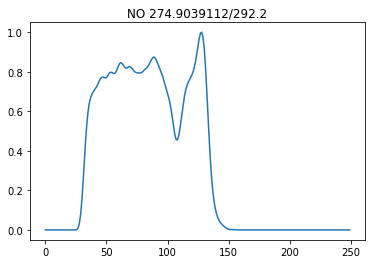

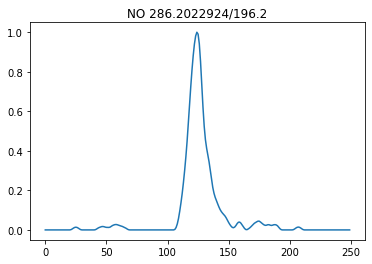

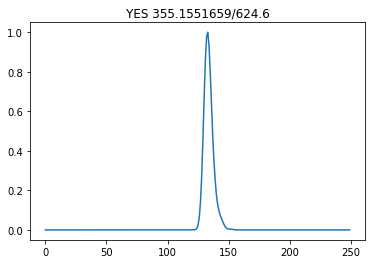

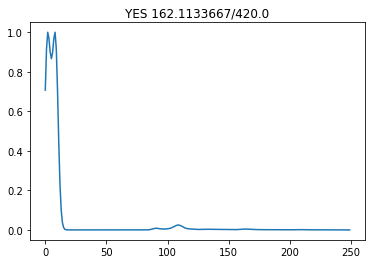

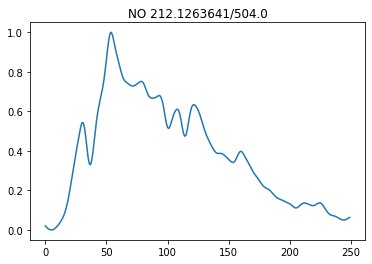

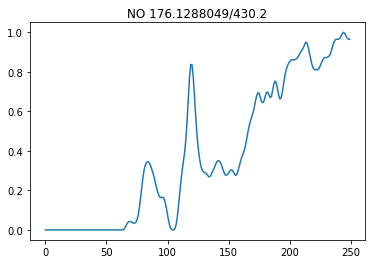

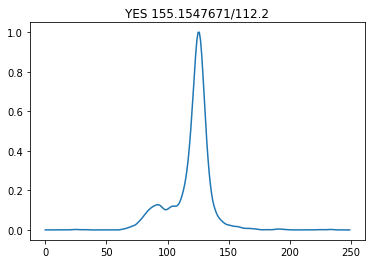

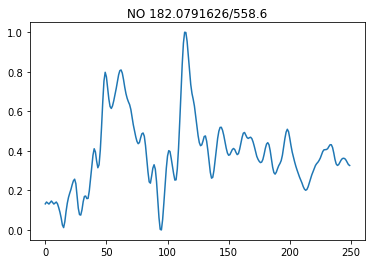

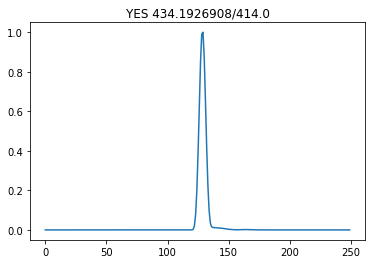

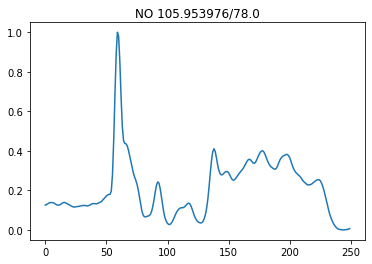

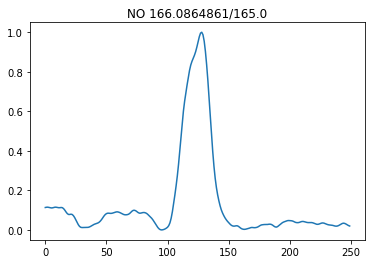

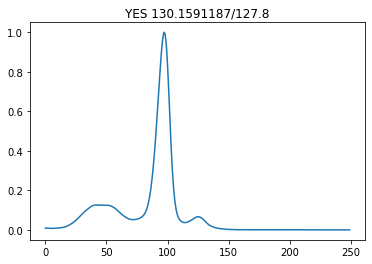

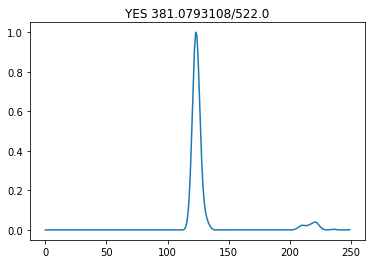

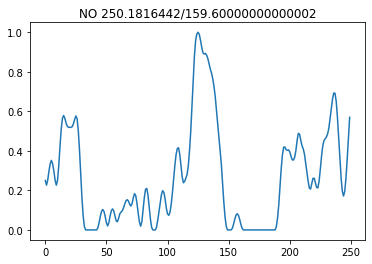

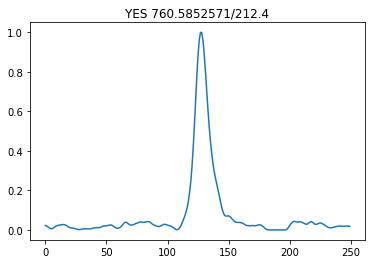

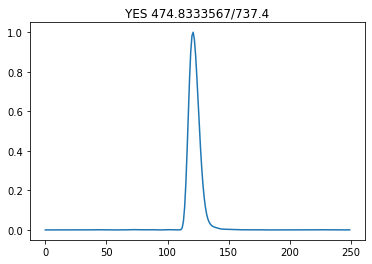

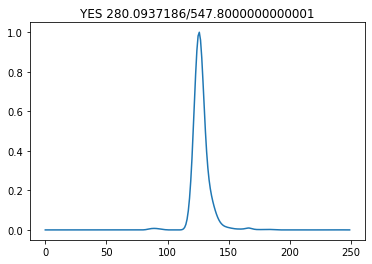

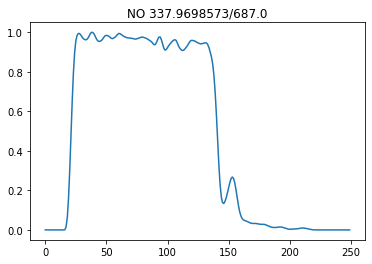

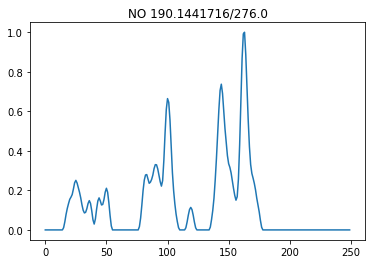

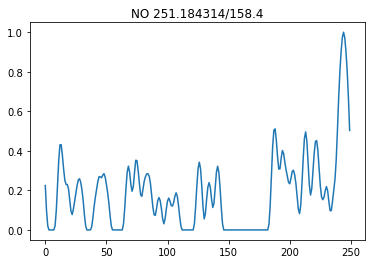

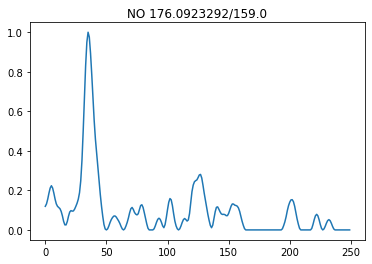

ERROR


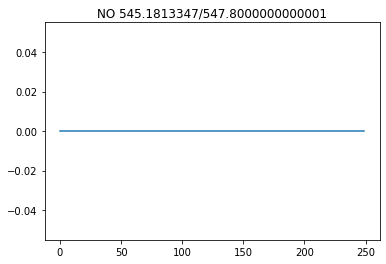

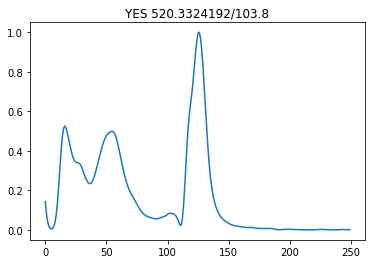

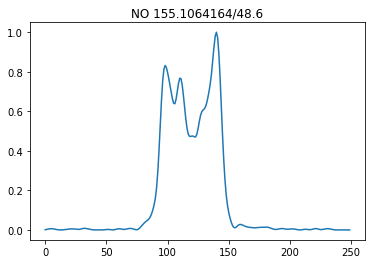

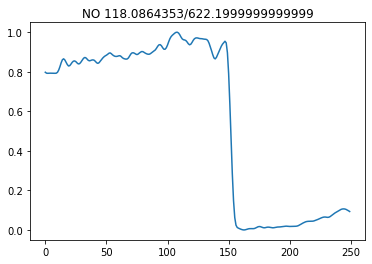

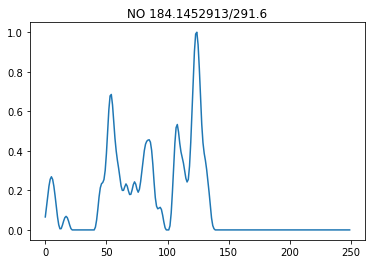

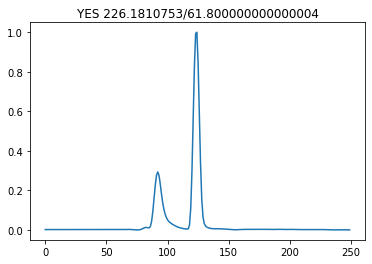

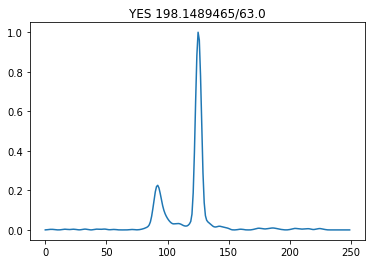

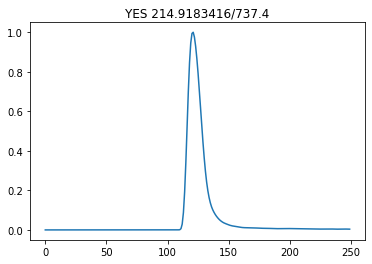

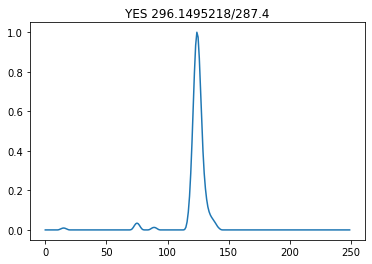

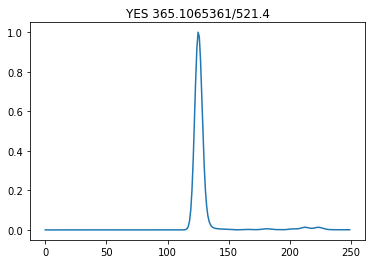

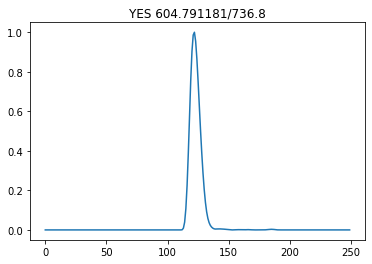

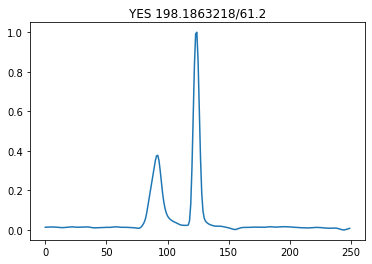

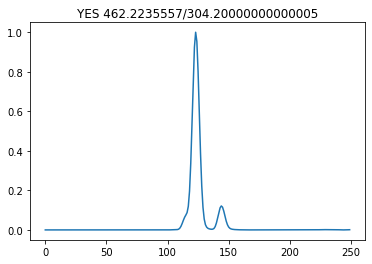

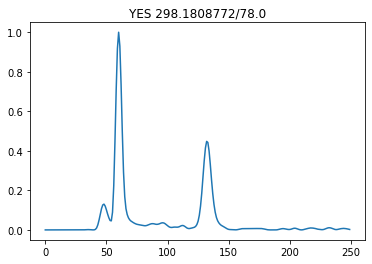

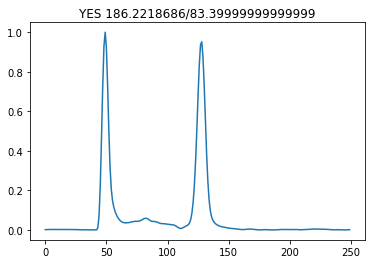

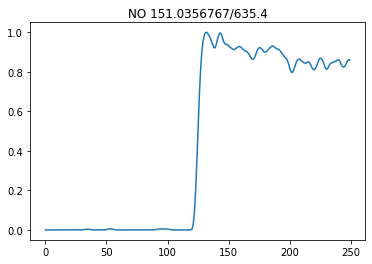

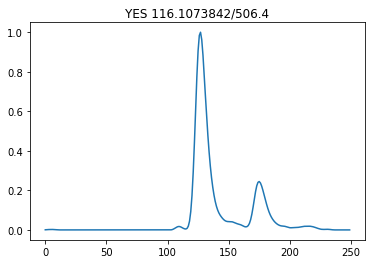

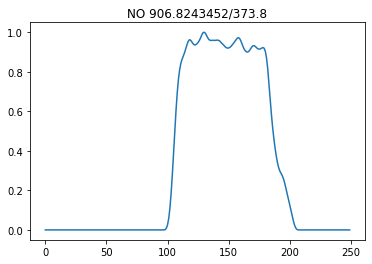

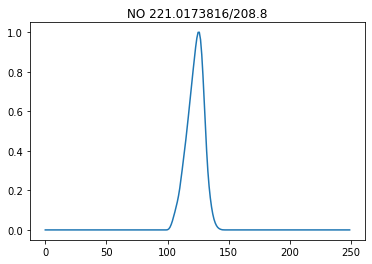

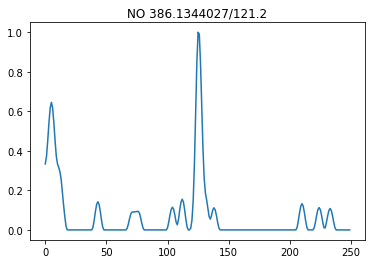

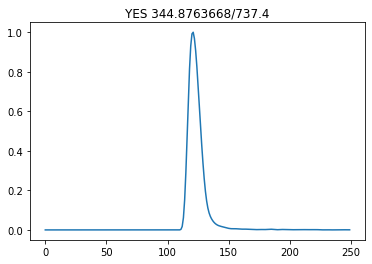

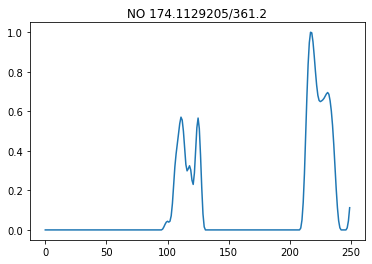

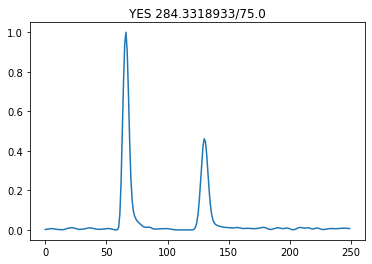

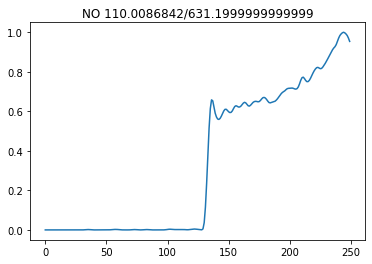

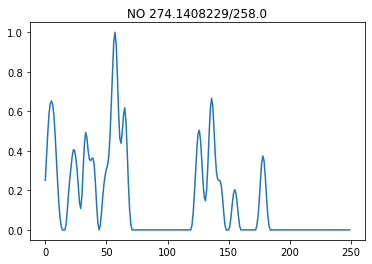

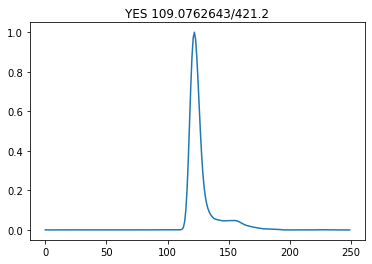

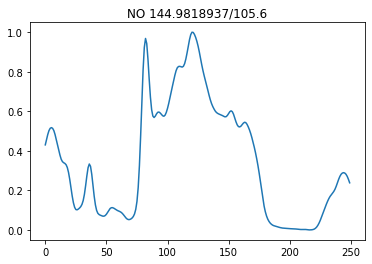

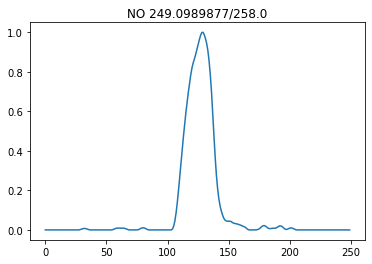

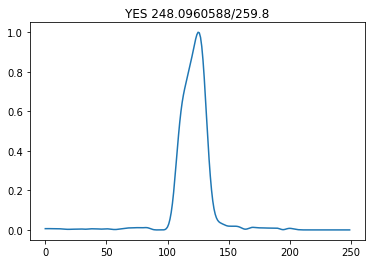

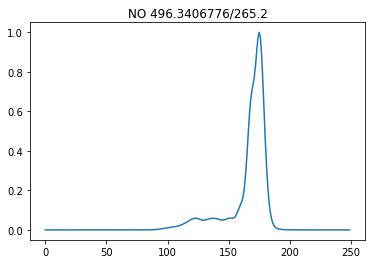

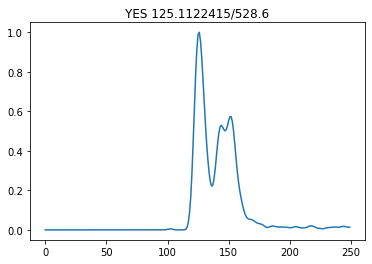

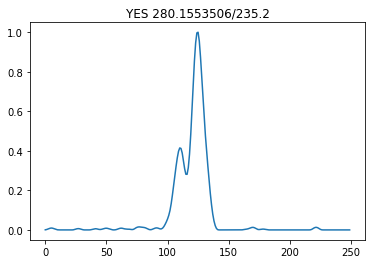

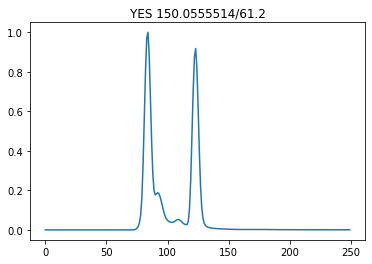

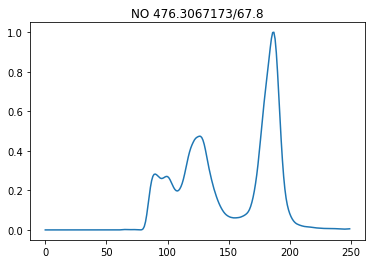

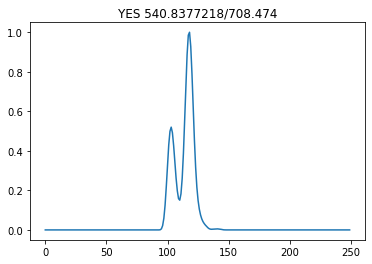

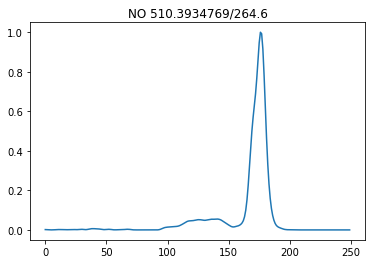

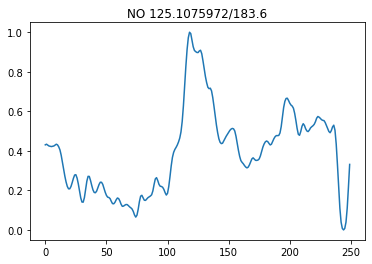

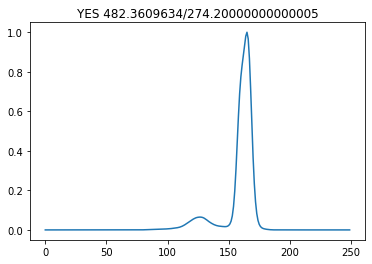

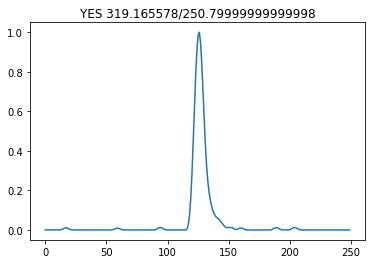

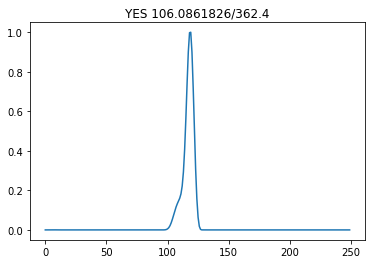

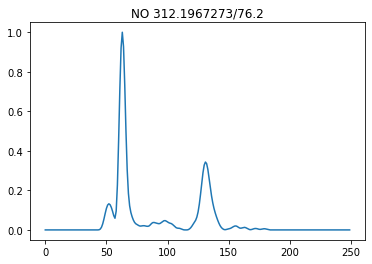

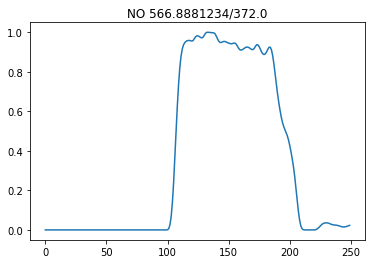

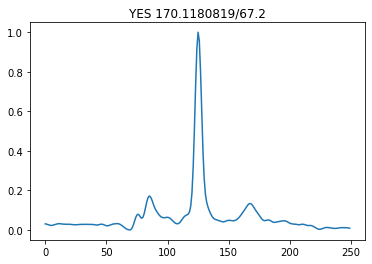

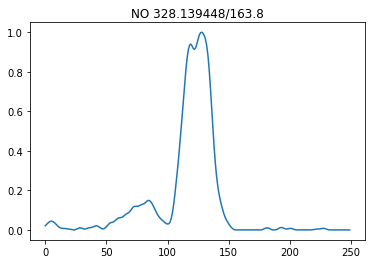

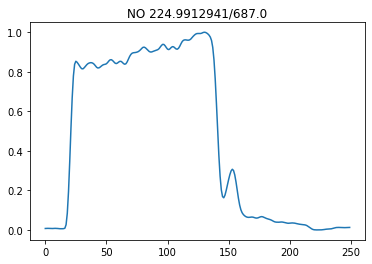

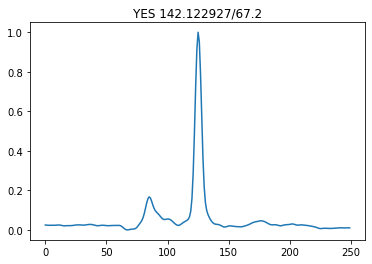

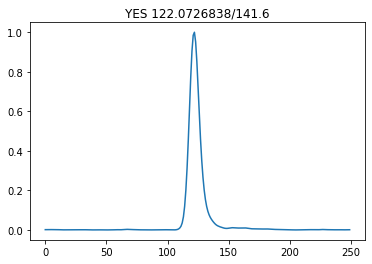

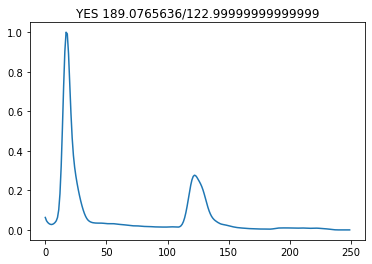

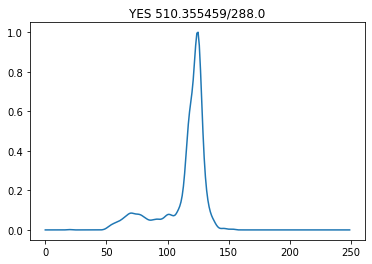

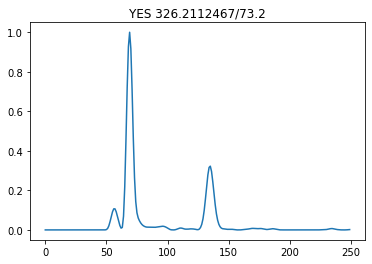

ERROR


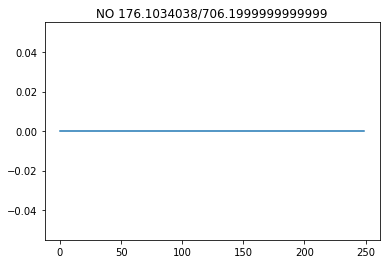

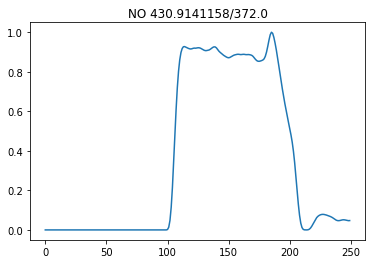

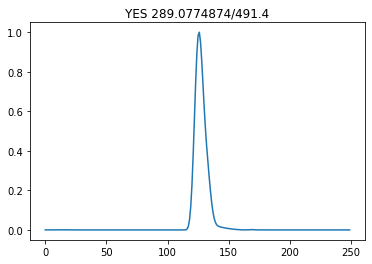

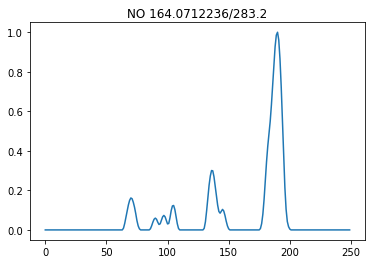

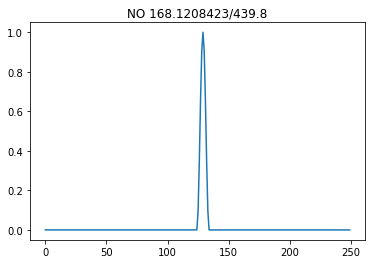

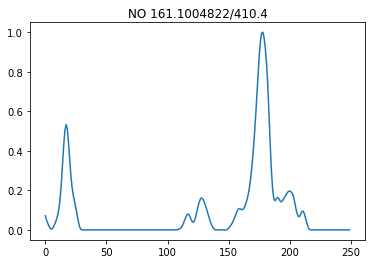

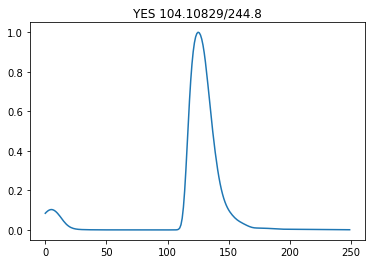

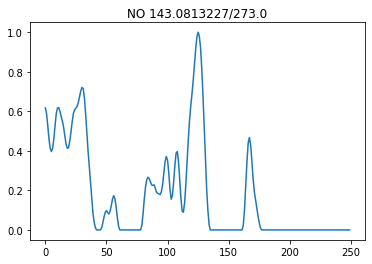

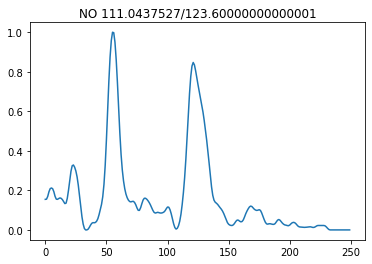

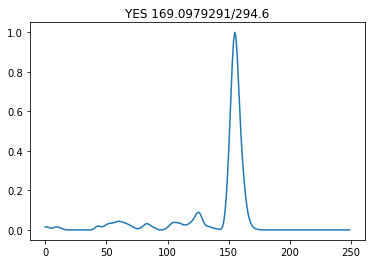

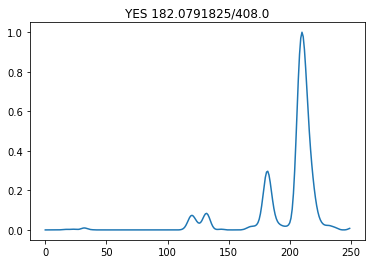

ERROR


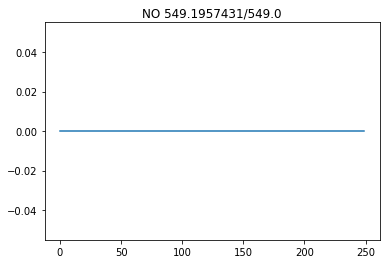

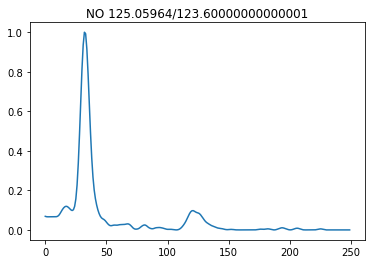

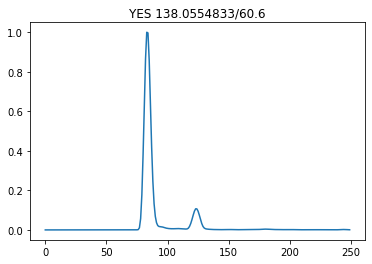

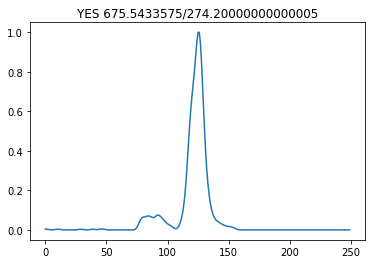

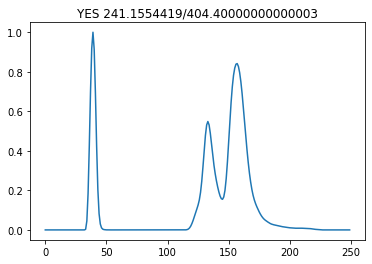

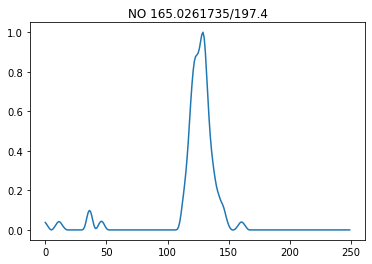

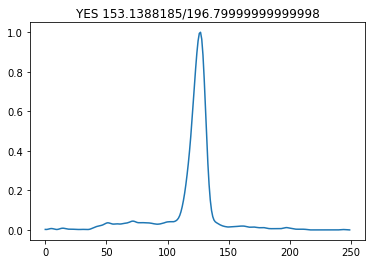

In [120]:
(X_test, y_test) = build_data_ml(data_test2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


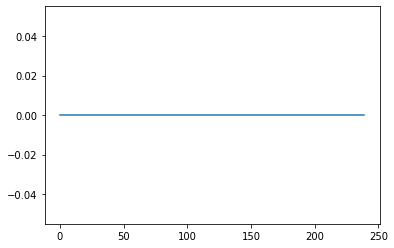

In [121]:
# to inpect single peak at time
c = get_data_mz(data_mz_path, 126.1030426, 470.4)
print(c)
plt.plot(c)
plt.show()

In [122]:
import numpy
from keras.models import Sequential , Model
from keras.layers import Dense
from keras.layers import LSTM, Input
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import tensorflow as tf

# ML

In [123]:
# fix random seed for reproducibility
numpy.random.seed(1)

In [142]:
inputvec = Input(shape=(240,1))
lstm = LSTM(10, activation="relu" ,return_sequences = False , return_state = True, go_backwards = True )
whole_seq_output,final_memory_state, final_carry_state = lstm(inputvec)
output = Dense(2)(final_memory_state)
final = Dense(1,activation = 'sigmoid')(output)
model = Model( inputs = inputvec , outputs = final)

opt = tf.keras.optimizers.RMSprop( learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 240, 1)]          0         
                                                                 
 lstm_10 (LSTM)              [(None, 10),              480       
                              (None, 10),                        
                              (None, 10)]                        
                                                                 
 dense_20 (Dense)            (None, 2)                 22        
                                                                 
 dense_21 (Dense)            (None, 1)                 3         
                                                                 
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x = sequence.pad_sequences(X_train, maxlen=240)

model.fit(x, np.array(y_train), epochs=200, batch_size=50)

Epoch 1/200
2/2 [==============================] - 3s 172ms/step - loss: 0.6928 - accuracy: 0.5354
Epoch 2/200
2/2 [==============================] - 0s 176ms/step - loss: 0.6924 - accuracy: 0.5354
Epoch 3/200
2/2 [==============================] - 0s 147ms/step - loss: 0.6921 - accuracy: 0.5354
Epoch 4/200
2/2 [==============================] - 0s 178ms/step - loss: 0.6919 - accuracy: 0.5354
Epoch 5/200
2/2 [==============================] - 0s 174ms/step - loss: 0.6917 - accuracy: 0.5354
Epoch 6/200
2/2 [==============================] - 0s 180ms/step - loss: 0.6916 - accuracy: 0.5354
Epoch 7/200
2/2 [==============================] - 0s 160ms/step - loss: 0.6915 - accuracy: 0.5354
Epoch 8/200
2/2 [==============================] - 0s 187ms/step - loss: 0.6913 - accuracy: 0.5354
Epoch 9/200
2/2 [==============================] - 0s 161ms/step - loss: 0.6913 - accuracy: 0.5354
Epoch 10/200
2/2 [==============================] - 0s 170ms/step - loss: 0.6913 - accuracy: 0.5354
Epoch 11/

2/2 [==============================] - 0s 220ms/step - loss: 0.6906 - accuracy: 0.5354
Epoch 84/200
2/2 [==============================] - 0s 182ms/step - loss: 0.6907 - accuracy: 0.5354
Epoch 85/200
2/2 [==============================] - 0s 170ms/step - loss: 0.6908 - accuracy: 0.5354
Epoch 86/200
2/2 [==============================] - 0s 164ms/step - loss: 0.6907 - accuracy: 0.5354
Epoch 87/200
2/2 [==============================] - 0s 177ms/step - loss: 0.6907 - accuracy: 0.5354
Epoch 88/200
2/2 [==============================] - 0s 179ms/step - loss: 0.6911 - accuracy: 0.5354
Epoch 89/200
2/2 [==============================] - 0s 139ms/step - loss: 0.6907 - accuracy: 0.5354
Epoch 90/200
2/2 [==============================] - 0s 128ms/step - loss: 0.6912 - accuracy: 0.5354
Epoch 91/200
2/2 [==============================] - 0s 146ms/step - loss: 0.6906 - accuracy: 0.5354
Epoch 92/200
2/2 [==============================] - 0s 164ms/step - loss: 0.6907 - accuracy: 0.5354
Epoch 93/200


In [140]:
# Final evaluation of the model
x_test = sequence.pad_sequences(X_test, maxlen=240)
scores = model.evaluate(x_test, np.array(y_test), verbose=0)

print("Accuracy: %.2f%%" % (scores[1]*100))
print(scores)

Accuracy: 50.00%
[0.6917369961738586, 0.5]
